In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, random_split

from models import *
from utils import *
from train import train
from dataset import customMNIST

##### Data

In [2]:
batch_size = 128

In [3]:
train_subset, val_subset = random_split(customMNIST(), [50000, 10000])
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, drop_last=True)

In [4]:
test_set = customMNIST(train=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, drop_last=True)

Shift every image in the training set to see the effect on the accuracy

In [5]:
shifted_set = customMNIST(hshift=-2)
shifted_loader = DataLoader(shifted_set, batch_size=batch_size, shuffle=True, drop_last=True)

##### MLP

In [6]:
model = MLP(28*28, [512, 256, 128, 64, 32, 16, 10])
print(model.n_params)

577178


In [7]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    model,
    optim.Adam,
    nn.CrossEntropyLoss(),
    2,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 1
)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

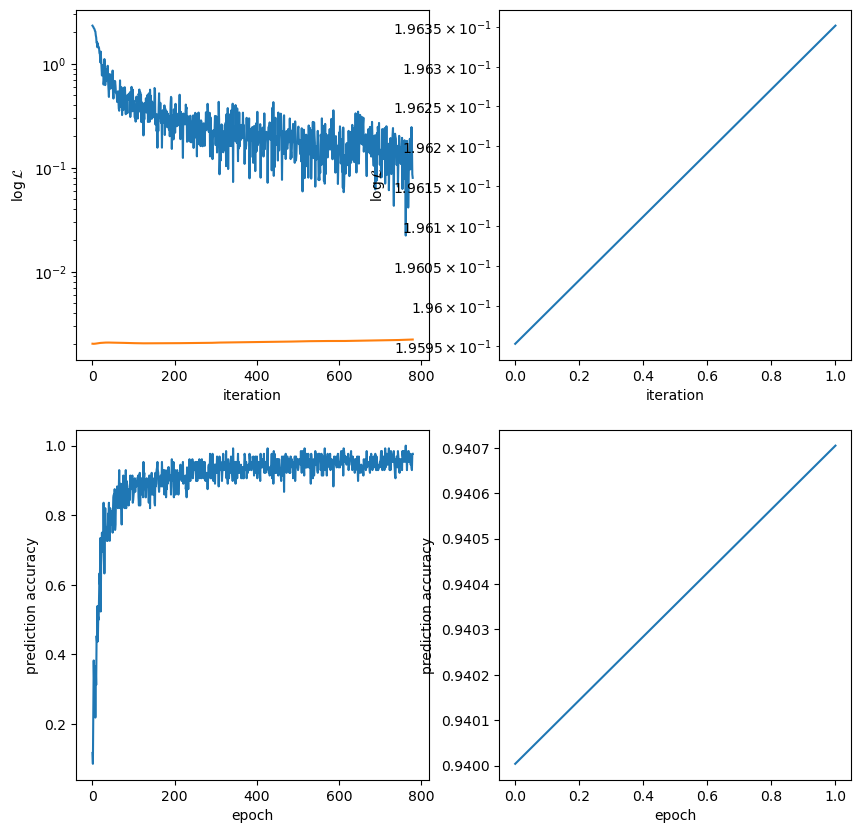

In [8]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [9]:
calc_accuracy(model, test_loader)

tensor(0.9425)

In [10]:
calc_accuracy(model, shifted_loader)

tensor(0.7683)

##### CNN

In [ ]:
cnnmodel = CNN([1, 8, 64, 128], 3, 0, (128,10))
print(cnnmodel.n_params)

In [ ]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    cnnmodel,
    optim.Adam,
    nn.CrossEntropyLoss(),
    10,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 1
)

In [ ]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [ ]:
calc_accuracy(cnnmodel, test_loader)

In [ ]:
calc_accuracy_accuracy(model, shifted_loader)

In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(10, 10))
ax[0][0].plot(train_loss)
ax[0][0].plot(reg_loss)
ax[0][1].plot(val_loss)
ax[0][0].set_yscale('log')
ax[0][1].set_yscale('log')
ax[1][0].plot(train_acc)
ax[1][1].plot(val_acc)
plt.show()

In [ ]:
with torch.no_grad():
    accuracies = []
    for x, y in test_loader:
        probs = p4mmodel(x)
        preds = probs.argmax(-1)
        accuracies.append((preds==y).float().mean())
    print(torch.tensor(accuracies).mean())

In [ ]:
# accuracy on shifted set
with torch.no_grad():
    accuracies = []
    for x, y in shifted_loader:
        probs = p4mmodel(x)
        preds = probs.argmax(-1)
        accuracies.append((preds==y).float().mean())
    print(torch.tensor(accuracies).mean())